<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modulo8_reactor_bioquimico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modulo 8 Reactores bioquímicos

Autor: Juan Manuel 

Fecha: enero 2021

In [96]:
install.packages("rootSolve")
install.packages("FME")
# cargar Grind.R
source("Grind.R")
# cargar librerías 
install.packages("GA")
library(GA)
install.packages("ggplot2")
library(ggplot2)

1. In this module we developed the modeling equations assuming that no biomass is fed to the reactor, Analyze the system studied for the case where the biomass feed concentration is 2.5% of the substrate feed concentration (so xf = 0.1 for the numerical values used in this module). Is there still the possibility of a washout steady-state?

In [1]:
# establecer modelo con xf 
monod <- function(times, state,parms) {
        with(as.list(c(state, parms)), {
                
                # velocidad de crecimiento 
                rx = mu_max*s/(ks + s)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rx
                
                # balance de materia para el sustrato
                dsdt = D*(sf - s) - rs
                
                # balance de materia para la biomasa
                dxdt = D*(xf - x) + rx
                
                return(list(c(dsdt,dxdt)))
        })
}

In [46]:
# establecer parámetros
p <- c(mu_max = 0.53, ks = 0.12, Yxs = 0.4, sf = 4, xf = 0.1, D = 2)

In [47]:
# establecer condiciones iniciales 
s <- c(s = 1, x = 1)

In [48]:
# tiempo de integración
times <- seq(0,100,len=100)

In [49]:
# resolver EDOs
out <- ode(y = s,times = times,func = monod,parms = p,method = "rk4")

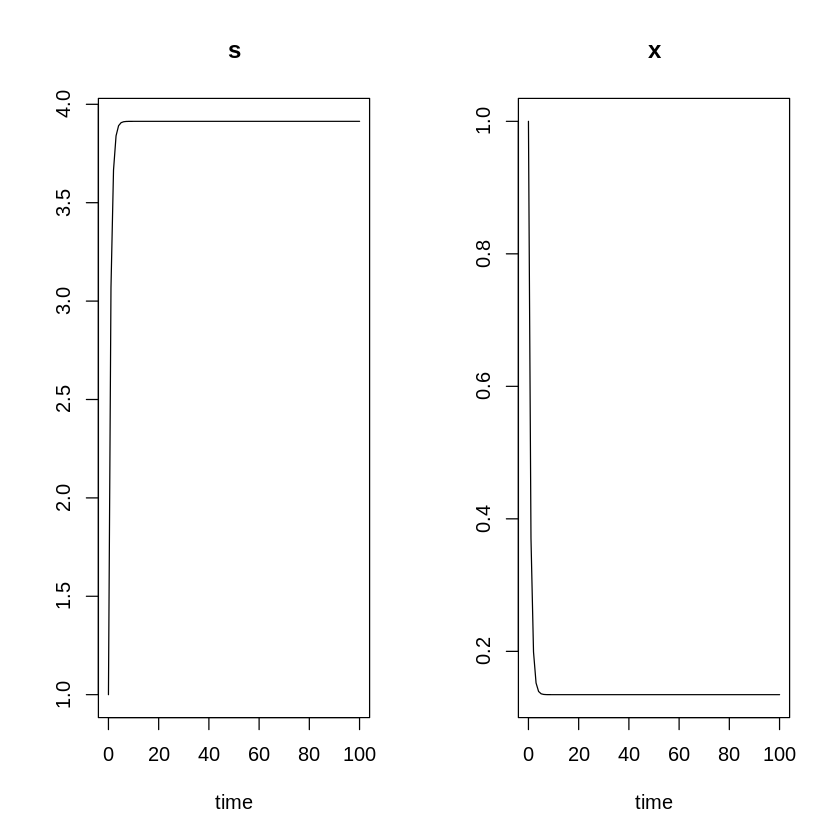

In [50]:
plot(out)

In [51]:
tail(out)

,time,s,x
"[95,]",94.94949,3.913474,0.1346105
"[96,]",95.95960,3.913474,0.1346105
"[97,]",96.96970,3.913474,0.1346105
"[98,]",97.97980,3.913474,0.1346105
"[99,]",98.98990,3.913474,0.1346105
"[100,]",100.00000,3.913474,0.1346105


Inclusive con $D = 2$ existe biomasa en el equilibrio

        s         x 
3.9134737 0.1346105 
Stable point, eigenvalues:  -2 -1.487084 


s         x 
3.9134737 0.1346105

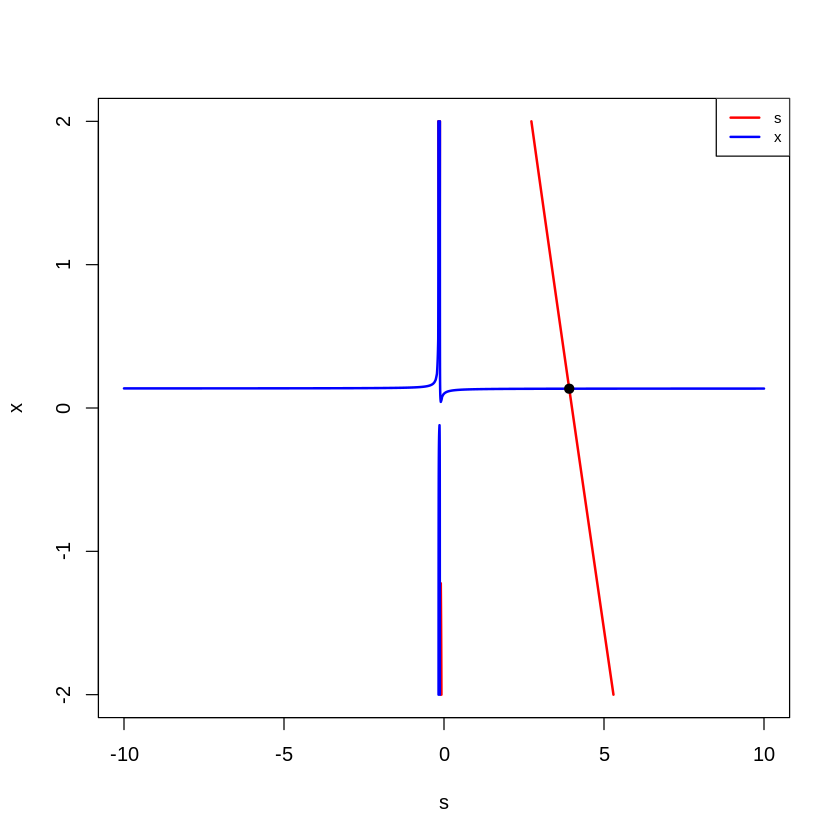

In [55]:
# plano de fase
par(mfrow = c(1,1))
plane(xmin = -10,xmax = 10,ymin = -2,ymax = 2, odes = monod)
newton(state = c(s=5, x = 0), odes = monod, plot = T)

          s           x 
 4.35252069 -0.04100828 
Unstable point, eigenvalues:  0.3661058 -0.15 


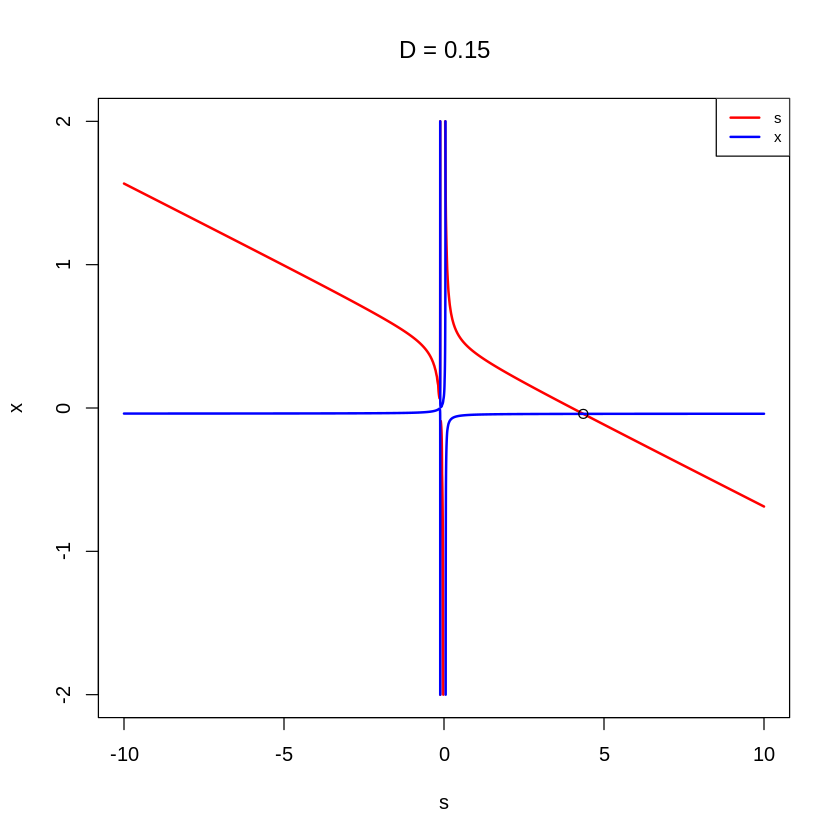

        s         x 
3.7361181 0.2055528 
Stable point, eigenvalues:  -1 -0.4886912 


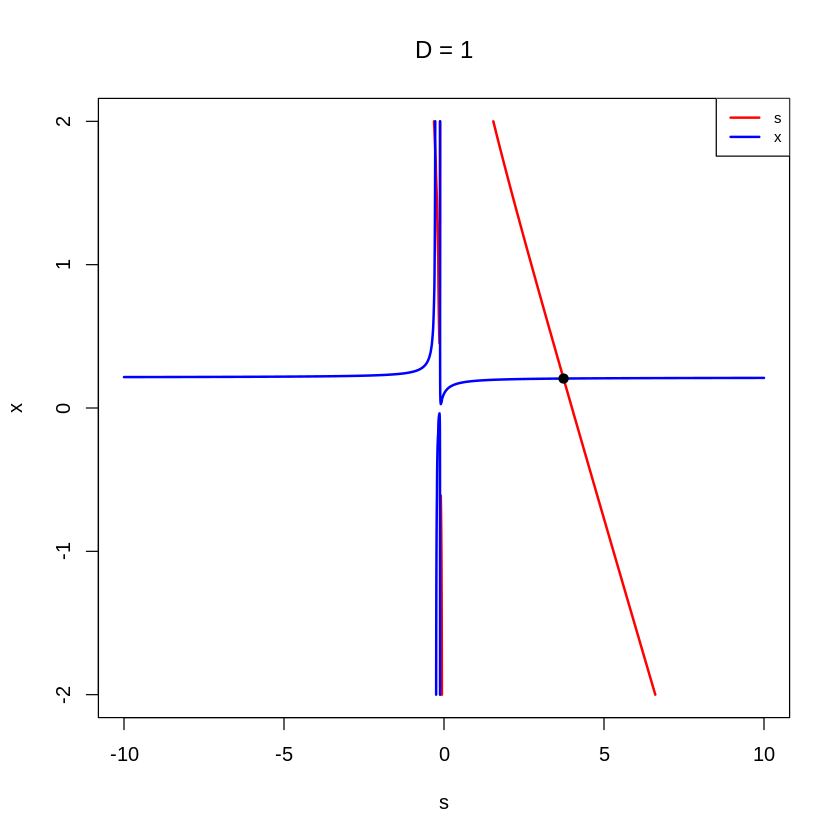

        s         x 
3.9134737 0.1346105 
Stable point, eigenvalues:  -2 -1.487084 


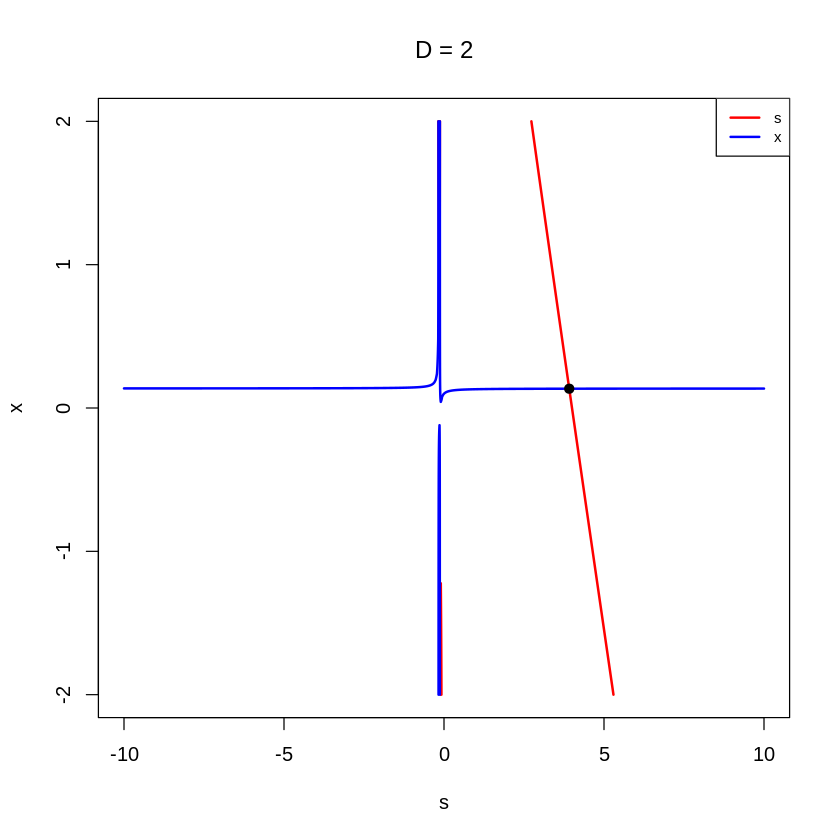

        s         x 
3.9864395 0.1054242 
Stable point, eigenvalues:  -10 -9.486482 


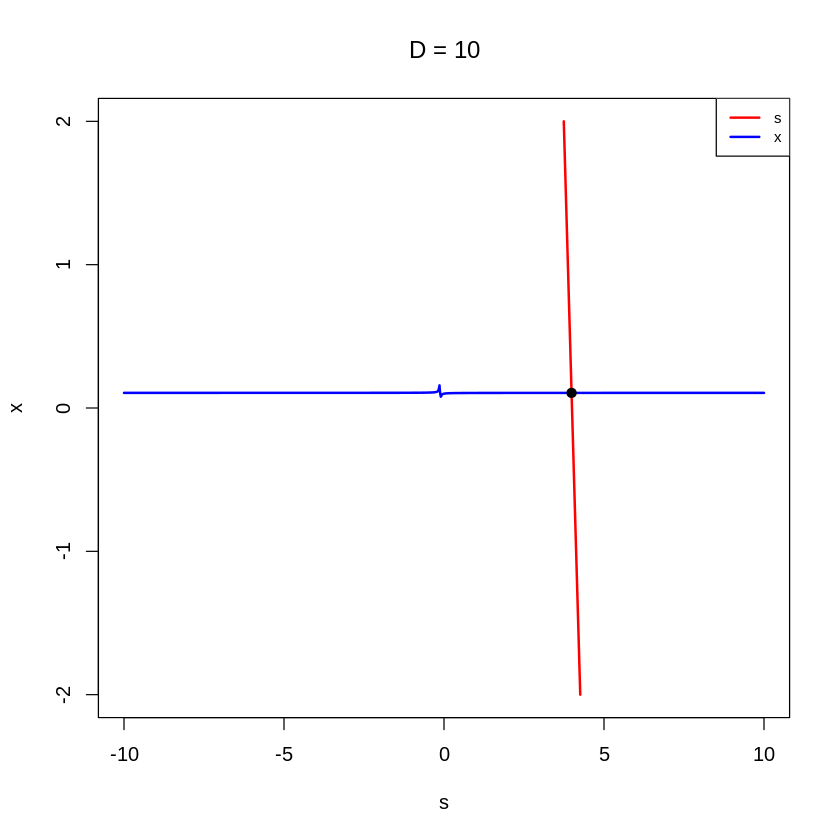

In [58]:
# estudair efecto del parámetro D
for (D in c(0.15,1,2,10)) {
        p["D"] <- D
        plane(xmin = -10,xmax = 10,ymin = -2,ymax = 2, 
              main = paste0("D = ", D), odes = monod)
        newton(state = c(s = 5, x = 0), plot = T, odes = monod)
}

Aun con $D = 10$ existe biomasa en el equilibrio. Supongo ha dejado de existir el equilibrio trivial con $x = 0$

2. Modify bio_phas_gen.mn and bio.mn to perform a phase-plane analysis for cases 2 and 3 with the substrate inhibition model

In [59]:
# modelo de inhibición por sustrato 
inhibition <- function(times, state,parms) {
        with(as.list(c(state, parms)), {
                
                # velocidad de crecimiento 
                rx = mu_max*s/(ks+ s + ki*s^2)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rx
                
                # balance de materia para el sustrato
                dsdt = D*(sf - s) - rs
                
                # balance de materia para la biomasa
                dxdt = -D*x + rx
                
                return(list(c(dsdt,dxdt)))
        })
}

In [68]:
# establecer parámetros
p <- c(mu_max = 0.53, ks = 0.12, Yxs = 0.4, sf = 4, D = 0.3, ki = 0.4545)

In [69]:
# establecer condiciones iniciales 
s <- c(s = 1, x = 1)

In [70]:
# tiempo de integración
times <- seq(0,100,len=100)

In [71]:
# resolver EDOs
out <- ode(y = s,times = times,func = inhibition,parms = p,method = "rk4")

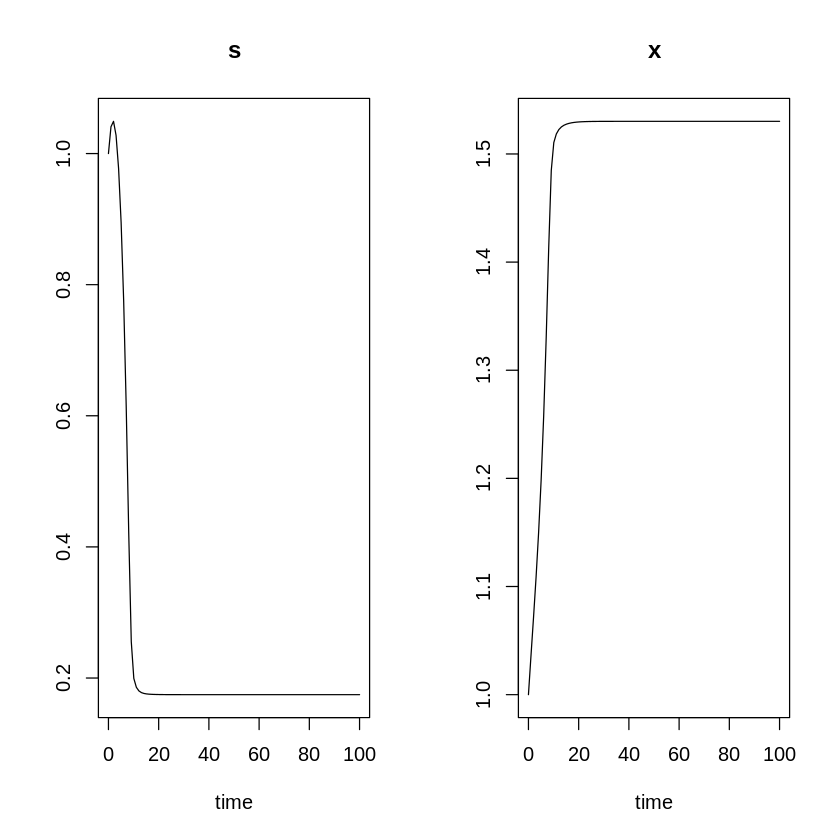

In [72]:
# mostrar resultados 
plot(out)

         s          x 
0.04777796 1.58088882 
Stable point, eigenvalues:  -8.743852 -0.15 
           s            x 
4.000000e+00 1.874825e-08 
Unstable point, eigenvalues:  -0.15 0.03609551 
         s          x 
 5.5261128 -0.6104451 
Stable point, eigenvalues:  -0.15 -0.02919147 


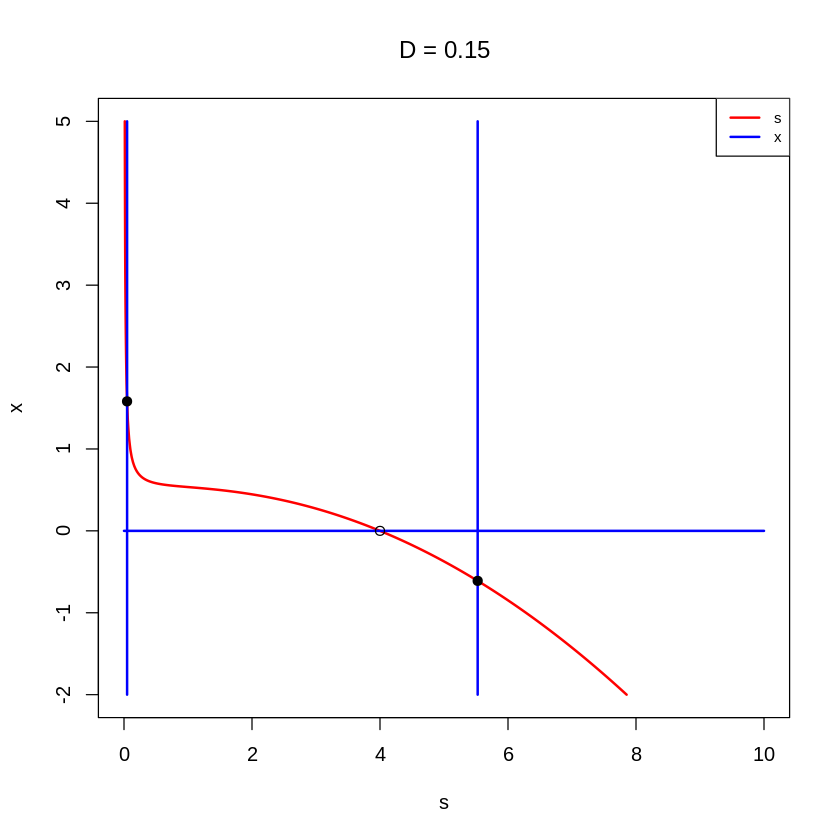

        s         x 
0.1745926 1.5301630 
Stable point, eigenvalues:  -2.262012 -0.3 
       s        x 
1.512243 0.995103 
Unstable point, eigenvalues:  -0.3 0.169836 
s x 
4 0 
Stable point, eigenvalues:  -0.3 -0.1139045 


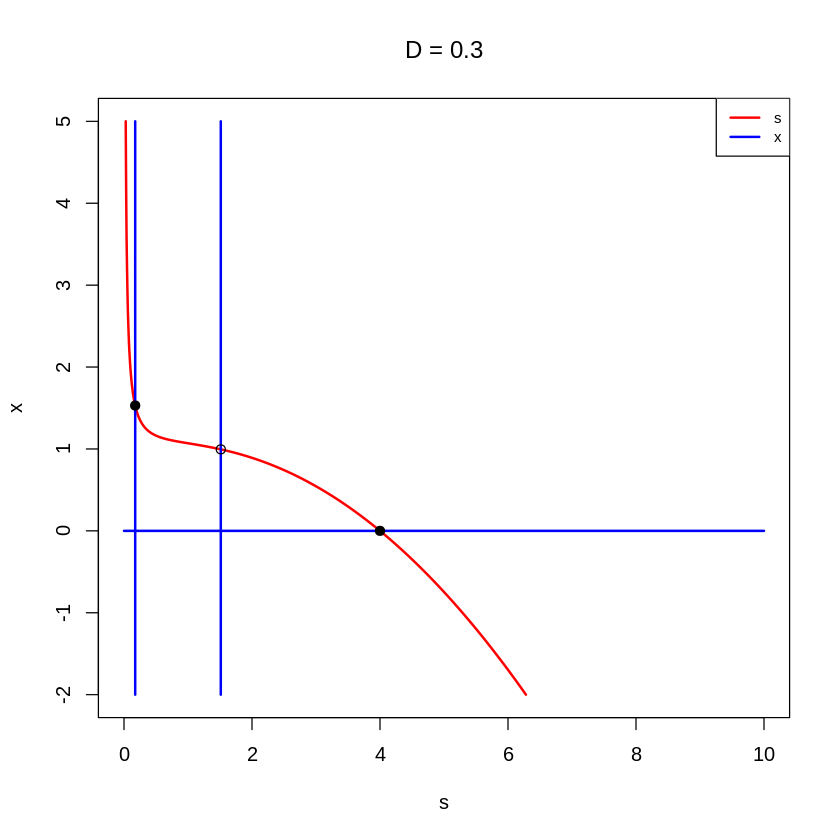

s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 
s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 
s x 
4 0 
Stable point, eigenvalues:  -0.45 -0.2639045 


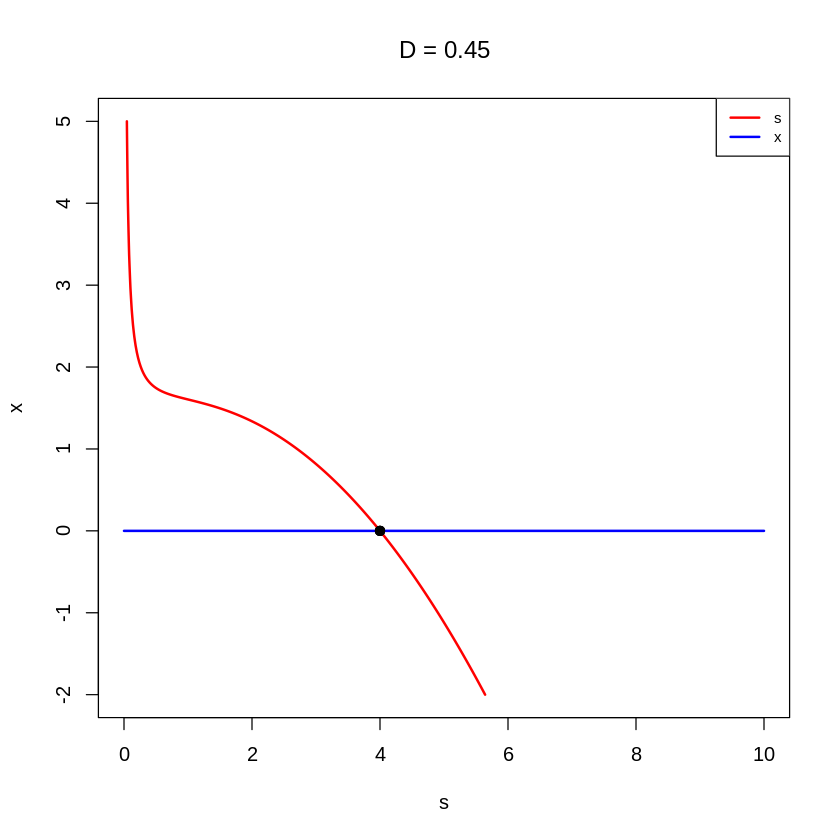

In [77]:
# plano de fase para los tres escenarios que plantean 
# estudair efecto del parámetro D
par(mfrow = c(1,1))
for (D in c(0.15,0.3,0.45)) {
        p["D"] <- D
        plane(xmin = 0,xmax = 10,ymin = -2,ymax = 5, 
              main = paste0("D = ", D), odes = inhibition)
        #run(traject = T)
        newton(state = c(s = 0, x = 5), plot = T, odes = inhibition)
        newton(state = c(s = 3, x = 1), plot = T, odes = inhibition)
        newton(state = c(s = 20, x = -1), plot = T, odes = inhibition)
}

Data for specific growth rate coefficient as a function substrate concentration for a biochemical reactor are shown below:

| s (g/L) | $\mu\ (h^{-1})$|
|:---:|:---:|
|0|0|
|0.1|0.38|
|0.25|0.54|
|0.5|0.63|
|0.75|0.66|
|1|0.68|
|1.5|0.70|
|3|0.73|
|5|0.74|

a. Estimate the parameter values for a Monod model $(k_{s},\ \mu_{max})$

In [106]:
# modelo de Monod
monod <- function(s,x) {

    mu_max = x[1]
    ks = x[2]

    mu = mu_max*s/(ks + s)

    out <- data.frame(s = s, mu = mu)

    return(out)
}

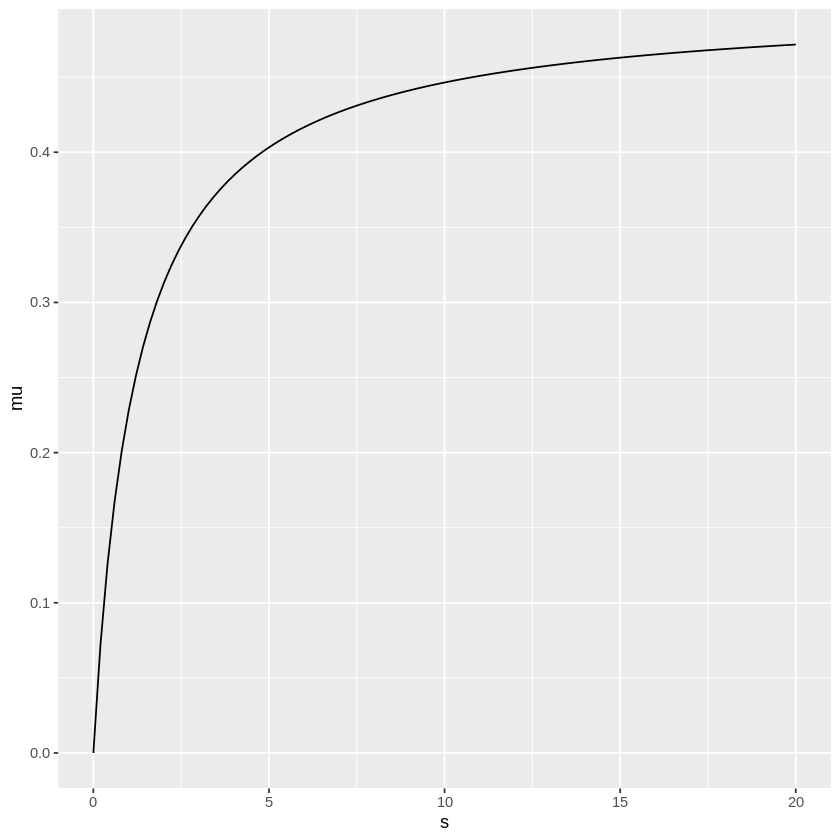

In [108]:
# probar modelo 
s <- seq(0,20,len=100)
ggplot(monod(s,c(0.5,1.2)), aes(s,mu)) +
  geom_line()

In [114]:
# establecer función objetivo 
cost <- function(x, data) {
  out <- monod(s = s, x = x)
  cost <- modCost(model = out, obs = data, x = "s")$model
  return(-cost)
}

In [115]:
# guardar datos 
data <- data.frame(s = c(0,0.1,0.25,0.5,0.75,1,1.5,3,5), mu = c(0,0.38,0.54,0.63,0.66,0.68,0.70,0.73,0.74))

In [116]:
head(data)

,s,mu
,<dbl>,<dbl>
1,0.00,0.00
2,0.10,0.38
3,0.25,0.54
4,0.50,0.63
5,0.75,0.66
6,1.00,0.68


In [117]:
# probar función de costo
cost(x = c(0.5,1.2), data = data)

[1] -1.415645

In [122]:
# optimización paramétrica con GA
GA <- ga(type = "real-value", 
          fitness = cost ,
          data = data, 
          lower = c(0,0), 
          upper = c(2,2), 
          maxiter = 10, names = c("mu_max", "ks"))

In [132]:
print(GA@solution)[1,]

        mu_max        ks
[1,] 0.8060187 0.1608508


mu_max        ks 
0.8060187 0.1608508

In [133]:
# realizar simulación con s experimental y parámetros óptimos  
out <- monod(data$s, print(GA@solution)[1,])
head(out)

        mu_max        ks
[1,] 0.8060187 0.1608508


,s,mu
,<dbl>,<dbl>
1,0.00,0.0000000
2,0.10,0.3089961
3,0.25,0.4904571
4,0.50,0.6098341
5,0.75,0.6636807
6,1.00,0.6943345


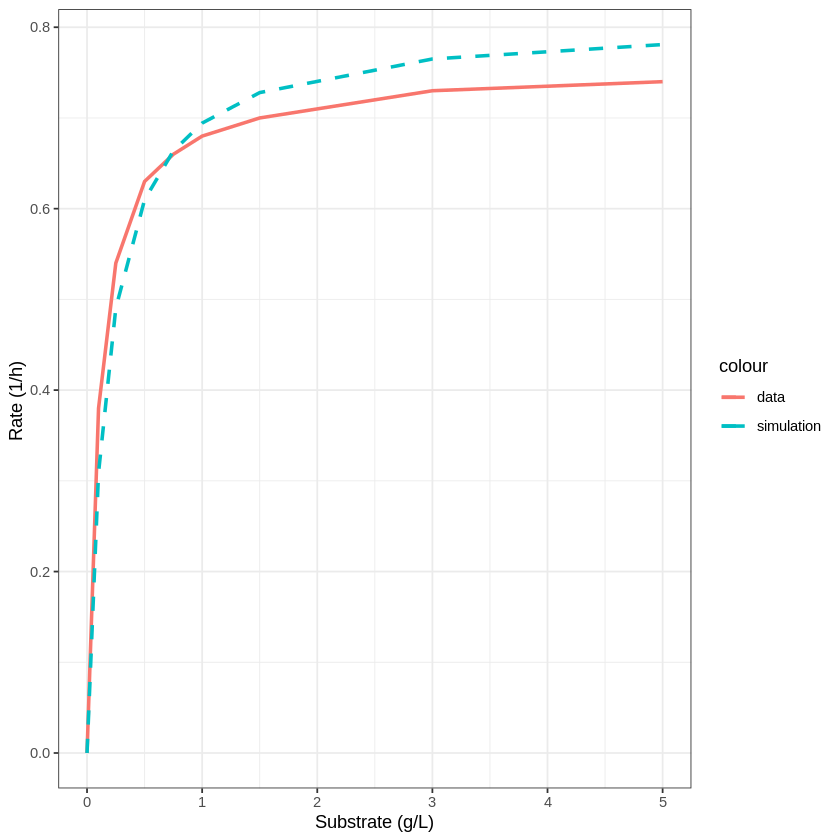

In [134]:
# comparar resultados de simulación con parámetros óptimos y datos experimentales
ggplot(data, aes(s)) +
    geom_line(aes(y=mu, color = "data"), lwd = 1, lty = 1) +
    geom_line(data = out, aes(y = mu, color = "simulation"), lwd = 1, lty = 2) +
    ylab("Rate (1/h) ") +
    xlab("Substrate (g/L)") +
    theme_bw()

Vemos que el ajuste es bueno 

The production rate of cells (biomass) is $Dx$. Find the steady-slale value of the dilution rate that maximi7.es the production rate of cells. The substrate feed concentration is 5 g/L.

En este problema tenemos que definir la función a optimizar

$$G(D) = D \bar{x} $$

Considerando que 

$$\bar{x} = Y_{xs} (s_f - \bar{s})$$

y

$$\bar{s} = \frac{D k_s}{\mu_{max} - D}$$

Tenemos 


$$G(D) = D Y_{xs} (s_f - \frac{D k_s}{\mu_{max} - D}) $$

El problema es encontrar el valor $D_{opt}$ que nos permita maximizar $G(D)$ dado que 

| parámetro | valor |
|:---:|:---:|
| $Y_{xs}$ | 0.4 |
| $sf$ | 5 g/L |
| $\mu_{max}$ | 0.56 1/h |
| $k_s$ | 0.2 g/L |

In [136]:
# cambiar valor de sf 
p["sf"] <- 5

In [143]:
# definir función objetivo 
gain <- function(p = p, x) {
  with(as.list(p),{

      G = x*Yxs*(sf - ks*x/(mu_max - x))

      return(G)
  })
}

In [144]:
# probar función objetivo 
gain(p, 0.5)

[1] 0.6

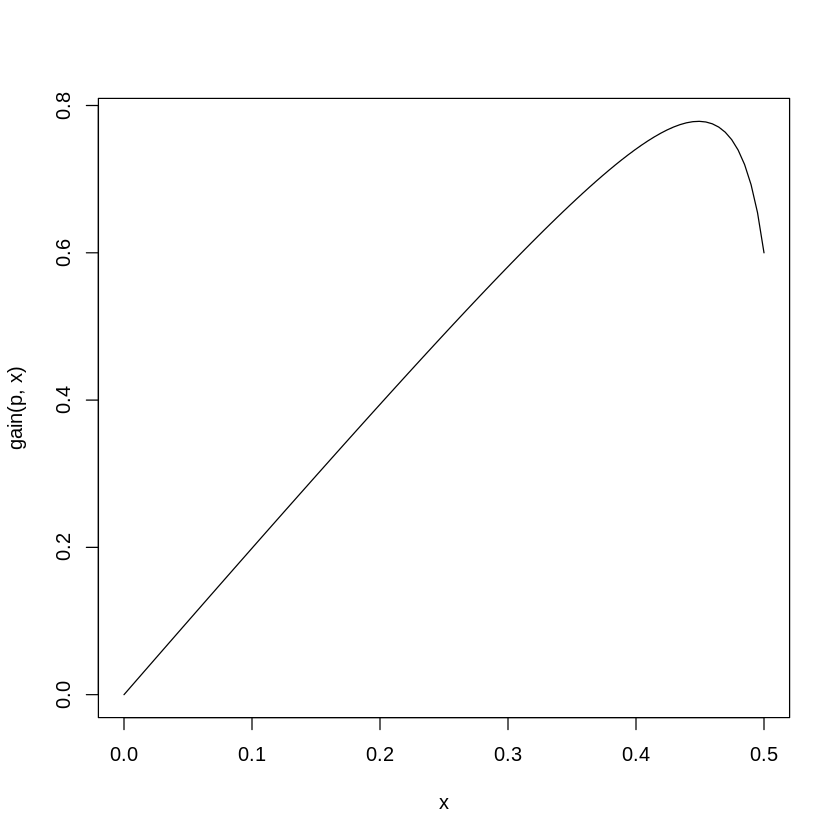

In [145]:
# graficar función objetivo 
x <- seq(0,0.5,len=100)
plot(x, gain(p,x), type = "l")

In [151]:
# función auxiliar para la optimización
gain2 <- function(x) {
  out <- gain(p,x)
  return(-out)
}

In [152]:
# optimizar con optimise()
sol <- optimise(f = gain2, lower = 0,upper = 0.5)
print(sol)

$minimum
[1] 0.4488652

$objective
[1] -0.7785332



El valor de $D$ que permite generar una máxima producción de biomasa es $D_{opt} = 0.448\ h^{-1}$ permitiendo obtener $m_x = 0.778\ g/L$ 

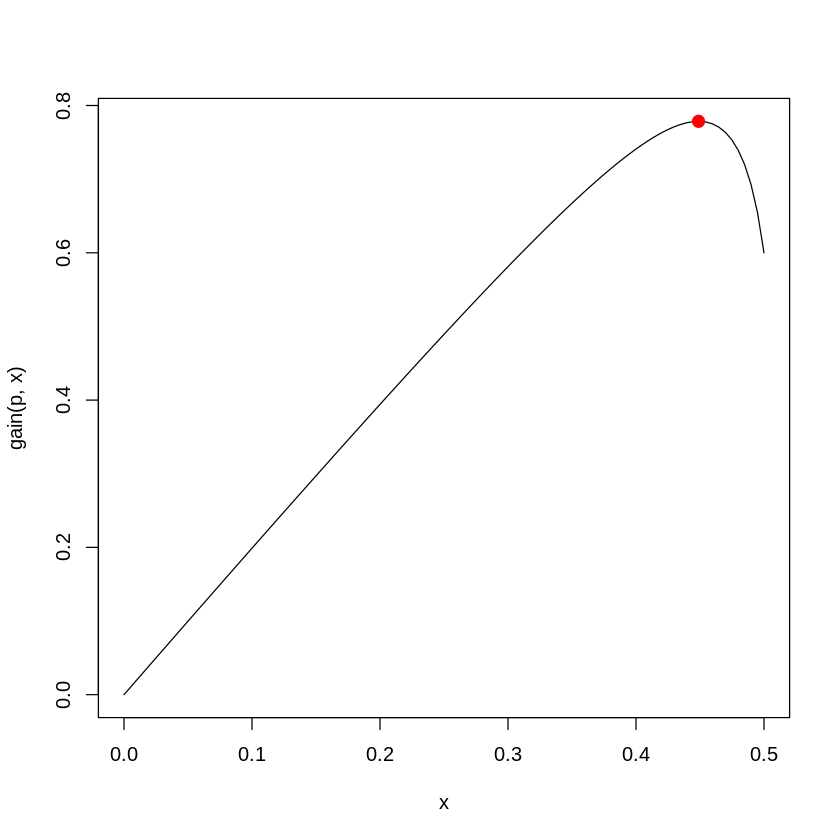

In [157]:
# mostrar resultados 
x <- seq(0,0.5,len=100)
plot(x, gain(p,x), type = "l")
points(sol$minimum, -sol$objective, pch = 20, col = "red", cex = 2)

c. Find the steady-state concentration of biomass and substrate at this dilution rate.

Para hacer esto de manera más general, creamos un función que regrese los puntos de equilibrio para cualquier valor $D$

In [158]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
  with(as.list(p), {

    # primer punto de equilibrio
    s = sf
    x = 0
    ss1 = c(s = s, x = x)

    # segundo punto de equilibrio
    s = D*ks/(mu_max - D)
    x = Yxs*(sf-s)
    ss2 = c(s = s, x = x)

  return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3)))
  })
}

In [160]:
p["D"] <- sol$minimum
print(p)
steady_state(p)

   mu_max        ks       Yxs        sf         D        ki 
0.5300000 0.1200000 0.4000000 5.0000000 0.4488652 0.4545000 


$ss1
s x 
5 0 

$ss2
    s     x 
0.664 1.734

De acuerdo con la salida anterior si $D = 0.448862\ h^{-1}$, entonces $\bar{x} = 1.734\ g/L$. Por lo tanto 

$$G(D) = D \bar{x} = 0.448862\ h^{-1} * 1.734\ g/ = 0.7878 g/h $$

Lo cual concuerda con los resultados obtenidos de la optimización 